In [1]:
import spacy
import en_core_web_sm
from goose3 import Goose
from spacy import displacy
import nltk
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# spacy & en_core_web_sm is language processor
# goose3 is article extractor
# nltk tokenizer tool
# wordcloud

In [13]:
nlp = spacy.load("en_core_web_sm")

In [14]:
nlp

In [15]:
g = Goose()
url = 'https://nypost.com/2022/09/12/brooklyn-mom-suspected-of-drowning-her-3-kids-was-facing-eviction/'
url_pt_ex = 'https://expresso.pt/internacional/isabel-ii/2022-09-14-Carlos-III-criticado-apos-noticia-de-despedimentos-de-funcionarios-b4ac0873'
url_pt_compare = ''
article = g.extract(url)
article_pt = g.extract(url_pt_ex)

In [16]:
dataset = nlp(article.cleaned_text)

In [17]:
displacy.render(dataset, style = 'ent', jupyter=True)


In [18]:
for entity in dataset.ents:
    if entity.label_ == 'PERSON':
        print(entity.text)

Erin Merdy
Zachary
Erin
Merdy
Levy Stephen
Jean Stephen
Merdy
Merdy
Merdy
Dine Stephen
Eddy Stephen
Merdy
Levy
Zachary
Levy
Merdy
Merdy
Zachary
Allen McFarland
Zachary
Merdy
McFarland
Merdy
Levy


In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
tokens = nltk.tokenize.word_tokenize(article.cleaned_text)

In [21]:
frequency = nltk.FreqDist(tokens)
most_common = frequency.most_common(50)
most_common

[(',', 60),
 ('.', 50),
 ('the', 38),
 ('’', 34),
 ('to', 29),
 ('a', 25),
 ('“', 25),
 ('her', 24),
 ('”', 22),
 ('was', 18),
 ('she', 18),
 ('s', 17),
 ('that', 17),
 ('and', 16),
 ('said', 16),
 ('I', 16),
 ('in', 14),
 ('of', 13),
 ('t', 13),
 ('She', 12),
 ('with', 11),
 ('Merdy', 11),
 ('for', 11),
 ('The', 10),
 ('children', 10),
 ('have', 10),
 ('Zachary', 8),
 ('three', 7),
 ('Monday', 7),
 ('but', 7),
 ('didn', 7),
 ('you', 7),
 ('on', 6),
 ('from', 5),
 ('back', 5),
 ('had', 5),
 ('who', 5),
 ('get', 5),
 ('at', 5),
 ('he', 5),
 ('life', 5),
 ('just', 5),
 ('would', 5),
 ('football', 5),
 ('mom', 4),
 ('mental', 4),
 ('before', 4),
 ('Post', 4),
 ('Coney', 4),
 ('Island', 4)]

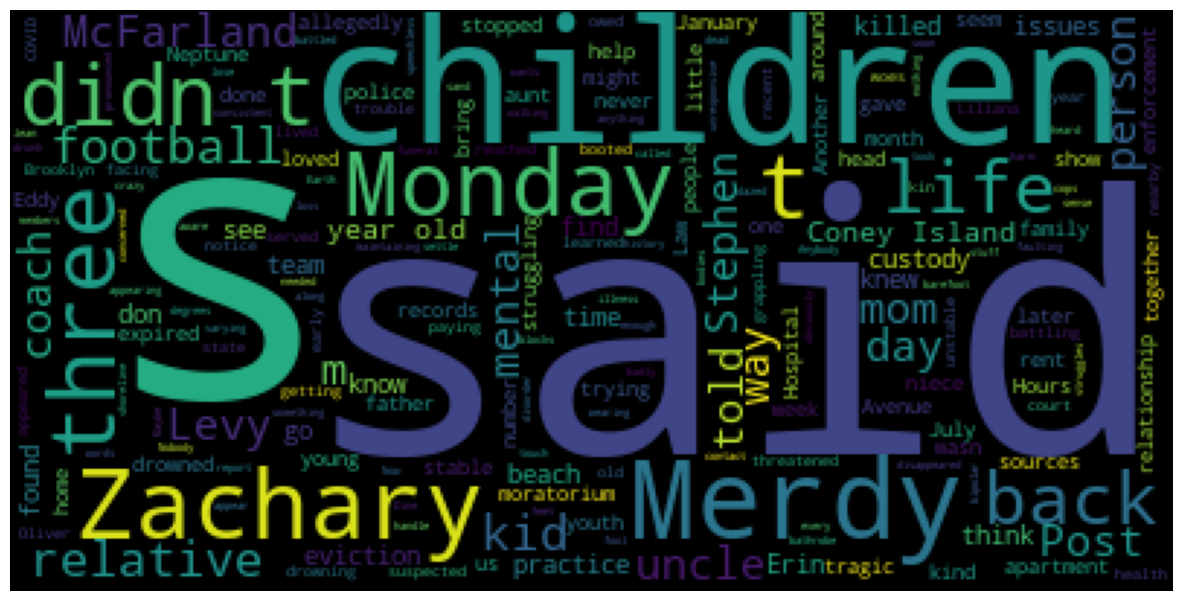

In [22]:
cloud = WordCloud()
cloud = cloud.generate(article.cleaned_text)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off');